# Projet de Statistique : Analyse du Jeu de Données meteoSDD

# Auteurs
DUSOLLIER Baptiste ; GERARD François ; SECHET Edouard ; GUILLARME Côme ; GUEDJ Alexandre ; HOUSSENALY Ali

## Partie 1 : Présentation et analyse exploratoire des données

### Import et aperçu

In [7]:
# Installation des packages si nécessaire
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("patchwork")) install.packages("patchwork")
if (!require("ggcorrplot")) install.packages("ggcorrplot")
if (!require("dplyr")) install.packages("dplyr")

# Chargement des packages
library(ggplot2)
library(patchwork)
library(rlang)
library(ggcorrplot)
library(dplyr)

In [3]:
# Lecture du fichier CSV
data <- read.csv("donnees-synop-essentielles-omm.csv", sep = ";")

In [4]:
# Aperçu des premières lignes
head(data)

# Dimensions du jeu de données
cat("Dimensions du jeu de données :", dim(data)[1], "lignes et", dim(data)[2], "colonnes\n")

# Noms des colonnes
cat("Noms des colonnes :", names(data), "\n")

ID.OMM.station Date                      Pression.au.niveau.mer
1  7181          2016-07-12T11:00:00+02:00 101410                
2 81405          2017-01-08T07:00:00+01:00 101140                
3  7627          2017-01-08T13:00:00+01:00 103380                
4 78894          2017-01-09T13:00:00+01:00 101760                
5  7020          2017-01-12T13:00:00+01:00 100580                
6  7280          2017-12-23T13:00:00+01:00 103830                
  Variation.de.pression.en.3.heures Type.de.tendance.barométrique
1  -30                               8                           
2 -140                               8                           
3  -40                               8                           
4    0                              NA                           
5 -710                               8                           
6  -10                               0                           
  Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn Température
1 230                            2.9                        293.35     
2 240                            0.5                        297.25     
3  30                            2.1                        277.55     
4 100                            2.3                        298.15     
5 210                           11.9                        282.05     
6  10                            2.7                        280.75     
  Point.de.rosée Humidité ⋯ Altitude communes..name.         communes..code.
1 286.55         65       ⋯ 336      Thuilley-aux-Groseilles 54523          
2 296.25         94       ⋯   4      Matoury                 97307          
3 269.75         57       ⋯ 414      Lorp-Sentaraille        09289          
4 291.35         66       ⋯  44                                             
5 280.15         88       ⋯   6      La Hague                50041          
6 278.35         85       ⋯ 219      Ouges                   21473          
  EPCI..name.                              EPCI..code. department..name. 
1 CC du Pays de Colombey et du Sud Toulois 245400510   Meurthe-et-Moselle
2 CA du Centre Littoral                    249730045   Guyane            
3 CC Couserans-Pyrénées                    200067940   Ariège            
4                                                 NA                     
5 CA du Cotentin                           200067205   Manche            
6 Dijon Métropole                          242100410   Côte-d'Or         
  department..code. region..name.           region..code. mois_de_l_annee
1 54                Grand Est               44             7             
2 973               Guyane                   3             1             
3 09                Occitanie               76             1             
4                                           NA             1             
5 50                Normandie               28             1             
6 21                Bourgogne-Franche-Comté 27            12

Dimensions du jeu de données : 1719567 lignes et 82 colonnes
Noms des colonnes : ID.OMM.station Date Pression.au.niveau.mer Variation.de.pression.en.3.heures Type.de.tendance.barométrique Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn Température Point.de.rosée Humidité Visibilité.horizontale Temps.présent Temps.passé.1 Temps.passé.2 Nebulosité.totale Nébulosité..des.nuages.de.l..étage.inférieur Hauteur.de.la.base.des.nuages.de.l.étage.inférieur Type.des.nuages.de.l.étage.inférieur Type.des.nuages.de.l.étage.moyen Type.des.nuages.de.l.étage.supérieur Pression.station Niveau.barométrique Géopotentiel Variation.de.pression.en.24.heures Température.minimale.sur.12.heures Température.minimale.sur.24.heures Température.maximale.sur.12.heures Température.maximale.sur.24.heures Température.minimale.du.sol.sur.12.heures Méthode.de.mesure.Température.du.thermomètre.mouillé Température.du.thermomètre.mouillé Rafale.sur.les.10.dernières.minutes Rafales.sur.une.période Periode.de.mesure

### Visualisation des données manquantes

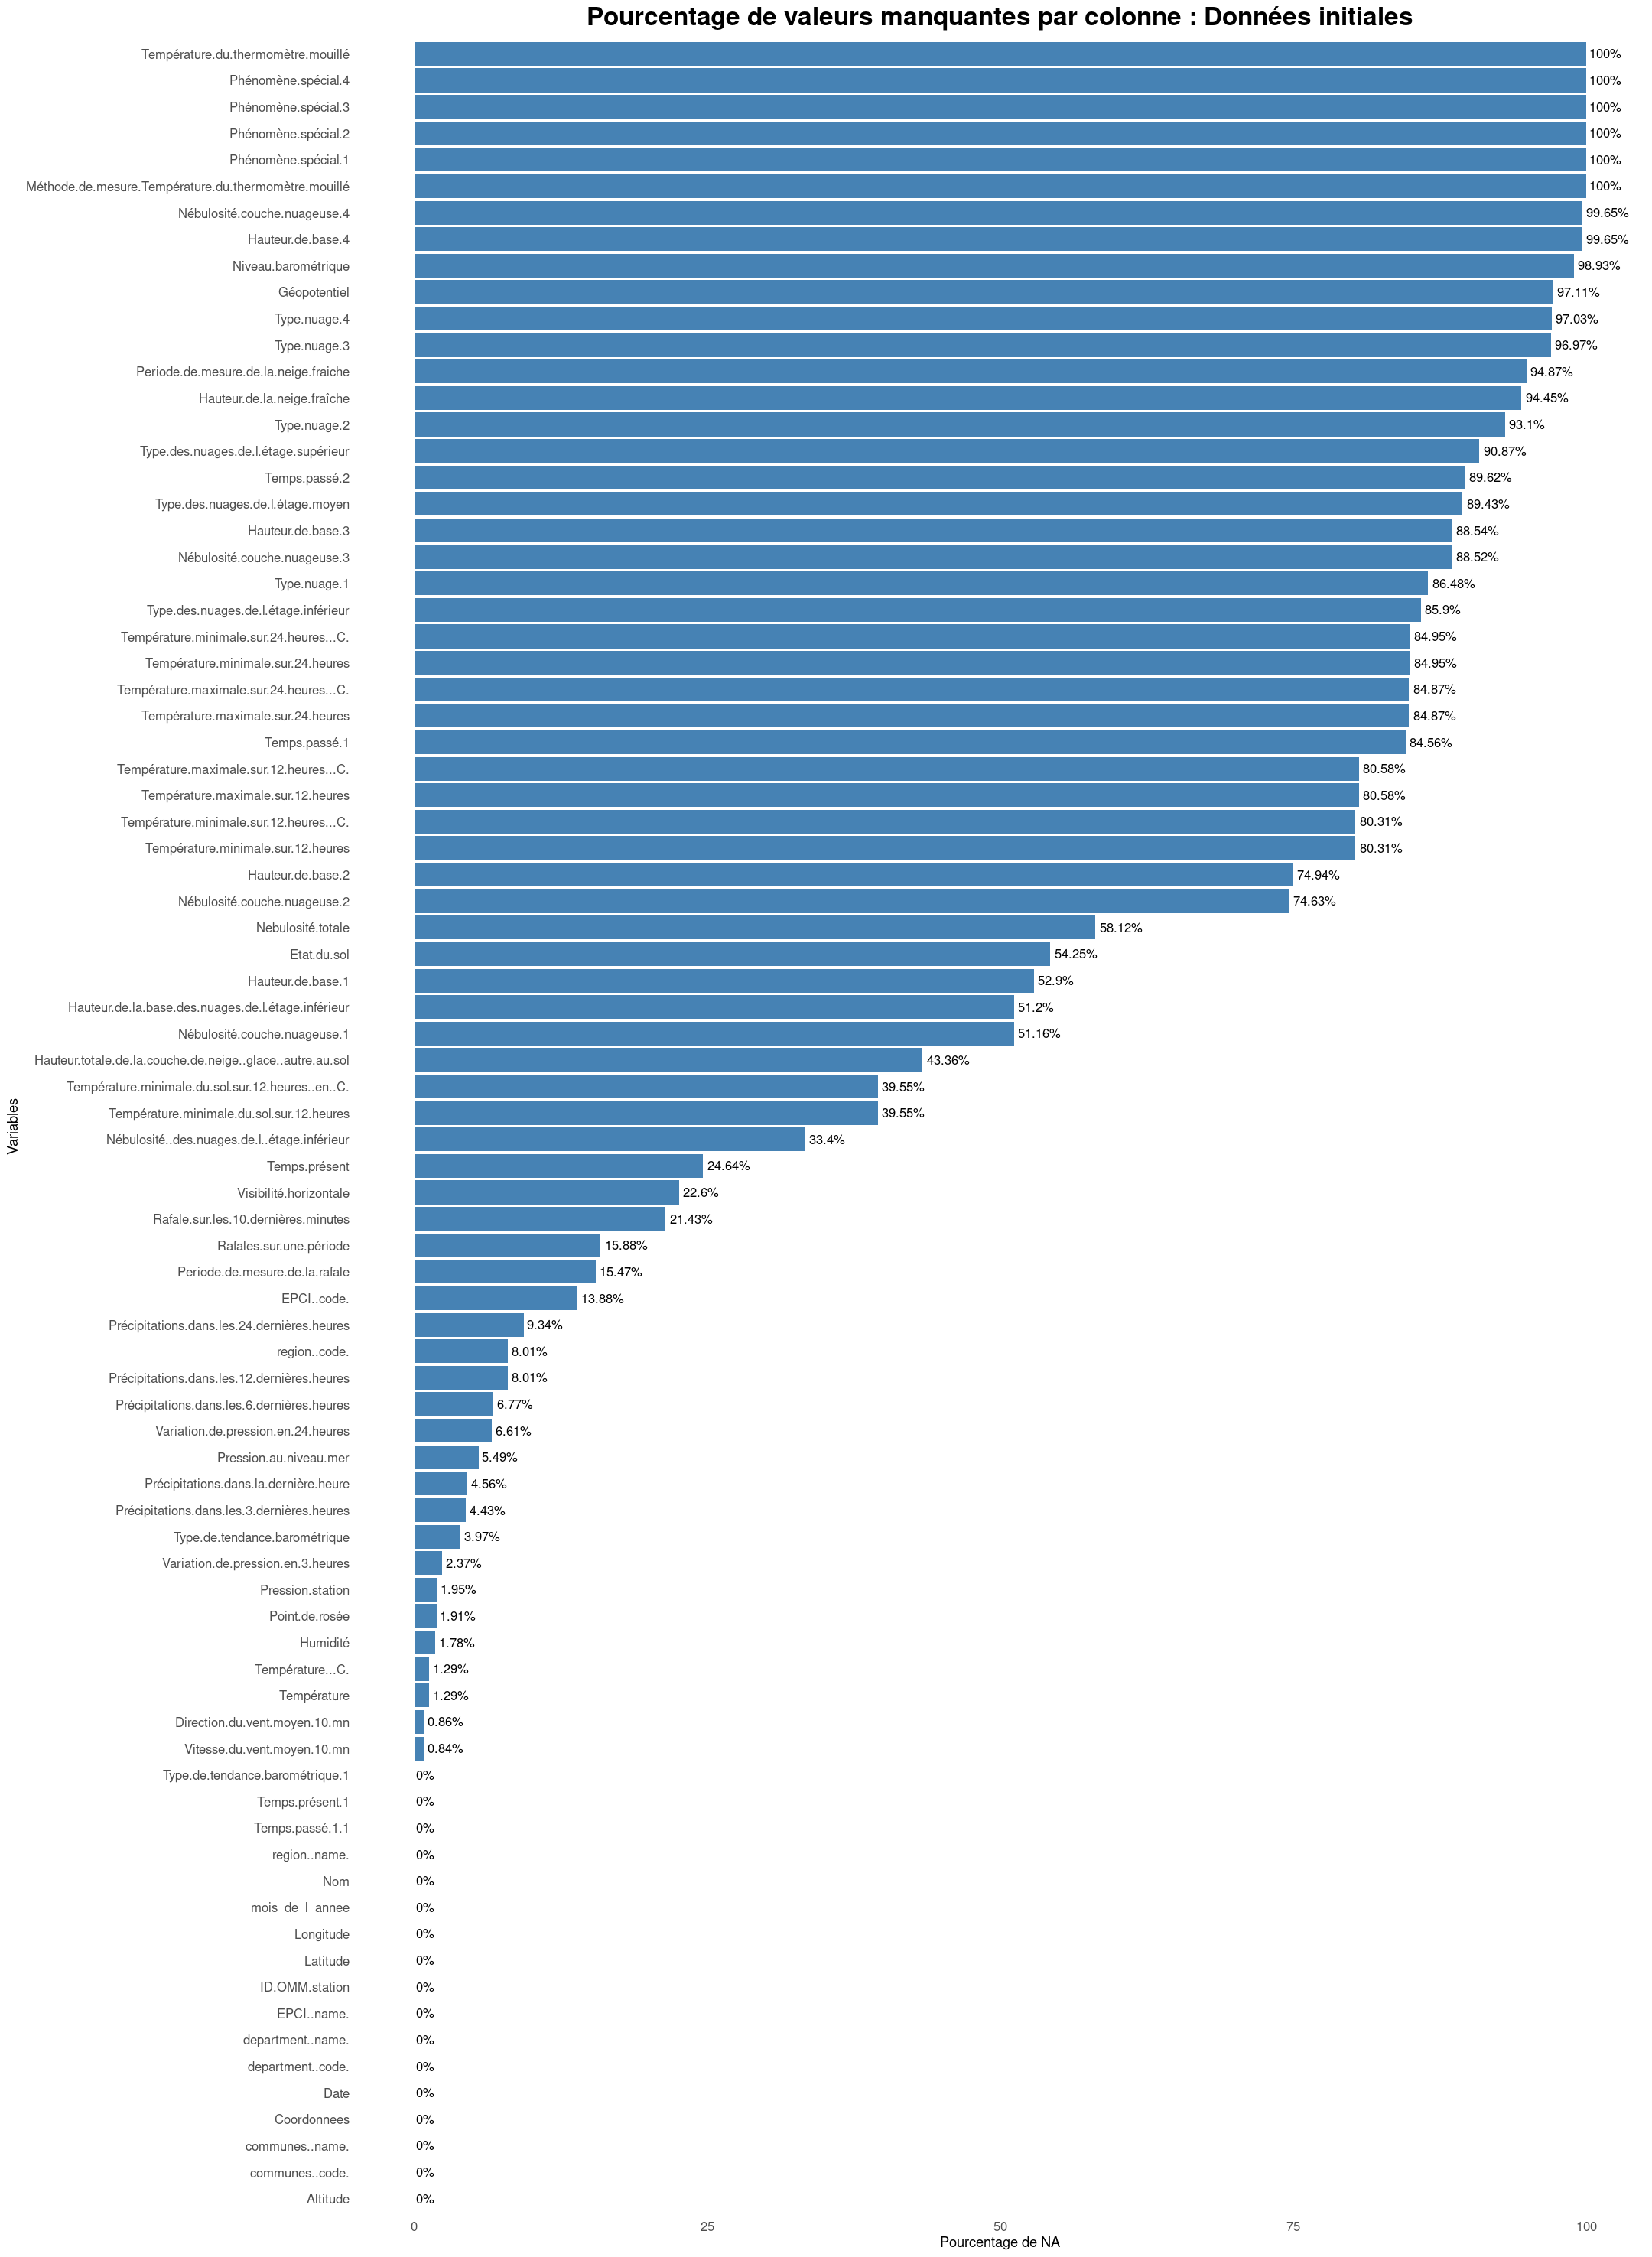

In [5]:
# Taille du graphique
options(repr.plot.width = 18, repr.plot.height = max(6, 0.3 * ncol(data)))

# Calcul du pourcentage de NA
na_percent <- sapply(data, function(x) mean(is.na(x)) * 100)
na_df <- data.frame(Variable = names(na_percent), NA_Percent = round(na_percent, 2))
na_df <- na_df[order(na_df$NA_Percent, decreasing = TRUE), ]

# Graphique
ggplot(na_df, aes(x = reorder(Variable, NA_Percent), y = NA_Percent)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = paste0(NA_Percent, "%")), hjust = -0.1, size = 3.5) +
  coord_flip() +
  labs(title = "Pourcentage de valeurs manquantes par colonne : Données initiales",
       x = "Variables",
       y = "Pourcentage de NA") +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

### Méthodologie d'approche du jeu de données

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -33.50    8.80   15.00   15.41   23.50   59.70   22176 

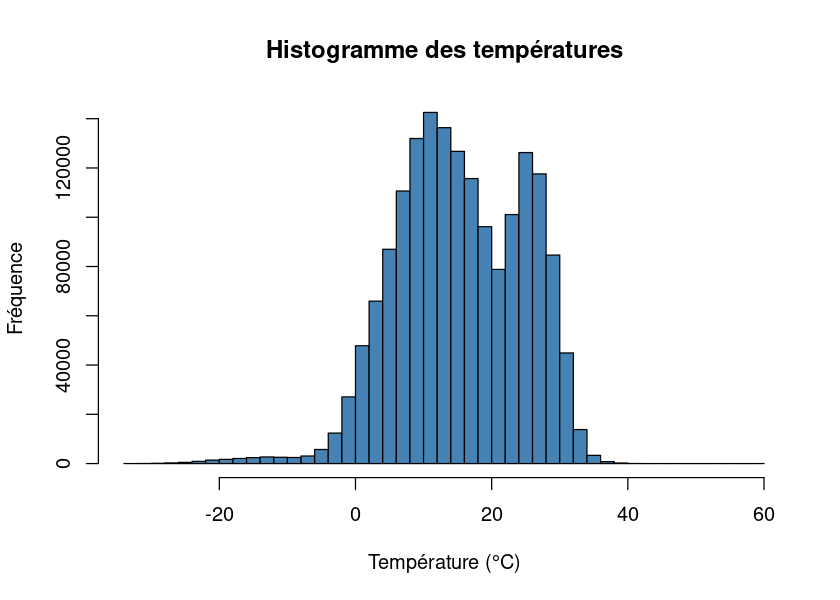

In [10]:
# Statistiques de base sur la température
summary(data$Température...C.)

# Taille du graphique
options(repr.plot.width = 7, repr.plot.height = 5)

# Histogramme des températures
hist(data_final$Température...C., 
     breaks = 50,  # Définit le nombre de barres
     main = "Histogramme des températures", 
     xlab = "Température (°C)", 
     ylab = "Fréquence",
     col = "steelblue", 
     border = "black")

Sur la base des graphes ci-dessus, tout au long de ce projet, nous prendrons comme indicateur cible **la température**. En effet :

- Elle est continue (elle peut prendre toute les valeurs dans l'intervalle : $[-33°C, 60°C]$), assez bien distribuée (on observe une répartition approximativement normale sur l'intervalle $[-5°C, 40°C]$), et présente dans presque toutes les lignes (seulement 1.29% des lignes sont vides pour cette variable)

- Elle est physiquement influencée par de nombreuses autres variables : pression, humidité, vent, précipitations, etc.

- Elle est interprétable : facile à relier à des phénomènes météo ou géographiques

- Elle est utile pour toutes les étapes suivantes :
    - Estimateurs : moyenne, variance, biais
    - Tests : comparaison entre régions ou saisons
    - Régression : prédiction à partir d'autres variables
    - ACP/PLS : réduction de dimension autour de la température
    - Clustering : regroupement de stations ou de jours selon profils thermique


Ainsi, pour rendre ce jeu de données plus digeste et sélectionner les éléments dont nous aurons besoin, nous allons prendre plusieurs décisions :

- Toutes les colonnes avec plus de 50 % de données manquantes sont retirées de notre analyse.

- Cette première décision supprime une grande partie des variables concernant la neige. En effet, ces variables ont beaucoup de valeurs manquantes puisqu’il ne neige pas tout au long de l’année. Au vu de cette décision, il est préférable de ne pas considérer la neige dans nos analyses et de supprimer toutes les colonnes restantes la concernant. Cela va nous permettre de simplifier un peu plus le dataset.

- Les colonnes de températures sélectionnées seront les colonnes en degré Celsius pour simplifier l’interprétation. En effet, les colonnes de température sont présentes en Kelvin et en degré Celsius ; il est inutile de conserver les deux.

Ces choix ne visent pas à appauvrir le jeu de données, mais à le rendre plus robuste et cohérent pour l’application des méthodes statistiques vues en cours. Ils permettent de concentrer l’analyse sur des variables fiables, interprétables et comparables.


### Nettoyage du jeu de données

In [8]:
# 1. Supprimer les colonnes avec plus de 50% de NA
na_threshold <- 0.5
na_percent <- sapply(data, function(x) mean(is.na(x)))
data_final <- data[, na_percent <= na_threshold]

# 2. Supprimer la colonne restante liée à la neige
data_final <- data_final[, !grepl("Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol", names(data_final))]

# 3. Conserver uniquement les colonnes de température en °C
data_final <- data_final[, !(names(data_final) %in% c("Température.minimale.du.sol.sur.12.heures", "Température"))]

Noms des colonnes : ID.OMM.station Date Pression.au.niveau.mer Variation.de.pression.en.3.heures Type.de.tendance.barométrique Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn Point.de.rosée Humidité Visibilité.horizontale Temps.présent Nébulosité..des.nuages.de.l..étage.inférieur Pression.station Variation.de.pression.en.24.heures Rafale.sur.les.10.dernières.minutes Rafales.sur.une.période Periode.de.mesure.de.la.rafale Précipitations.dans.la.dernière.heure Précipitations.dans.les.3.dernières.heures Précipitations.dans.les.6.dernières.heures Précipitations.dans.les.12.dernières.heures Précipitations.dans.les.24.dernières.heures Coordonnees Nom Type.de.tendance.barométrique.1 Temps.passé.1.1 Temps.présent.1 Température...C. Température.minimale.du.sol.sur.12.heures..en..C. Latitude Longitude Altitude communes..name. communes..code. EPCI..name. EPCI..code. department..name. department..code. region..name. region..code. mois_de_l_annee 


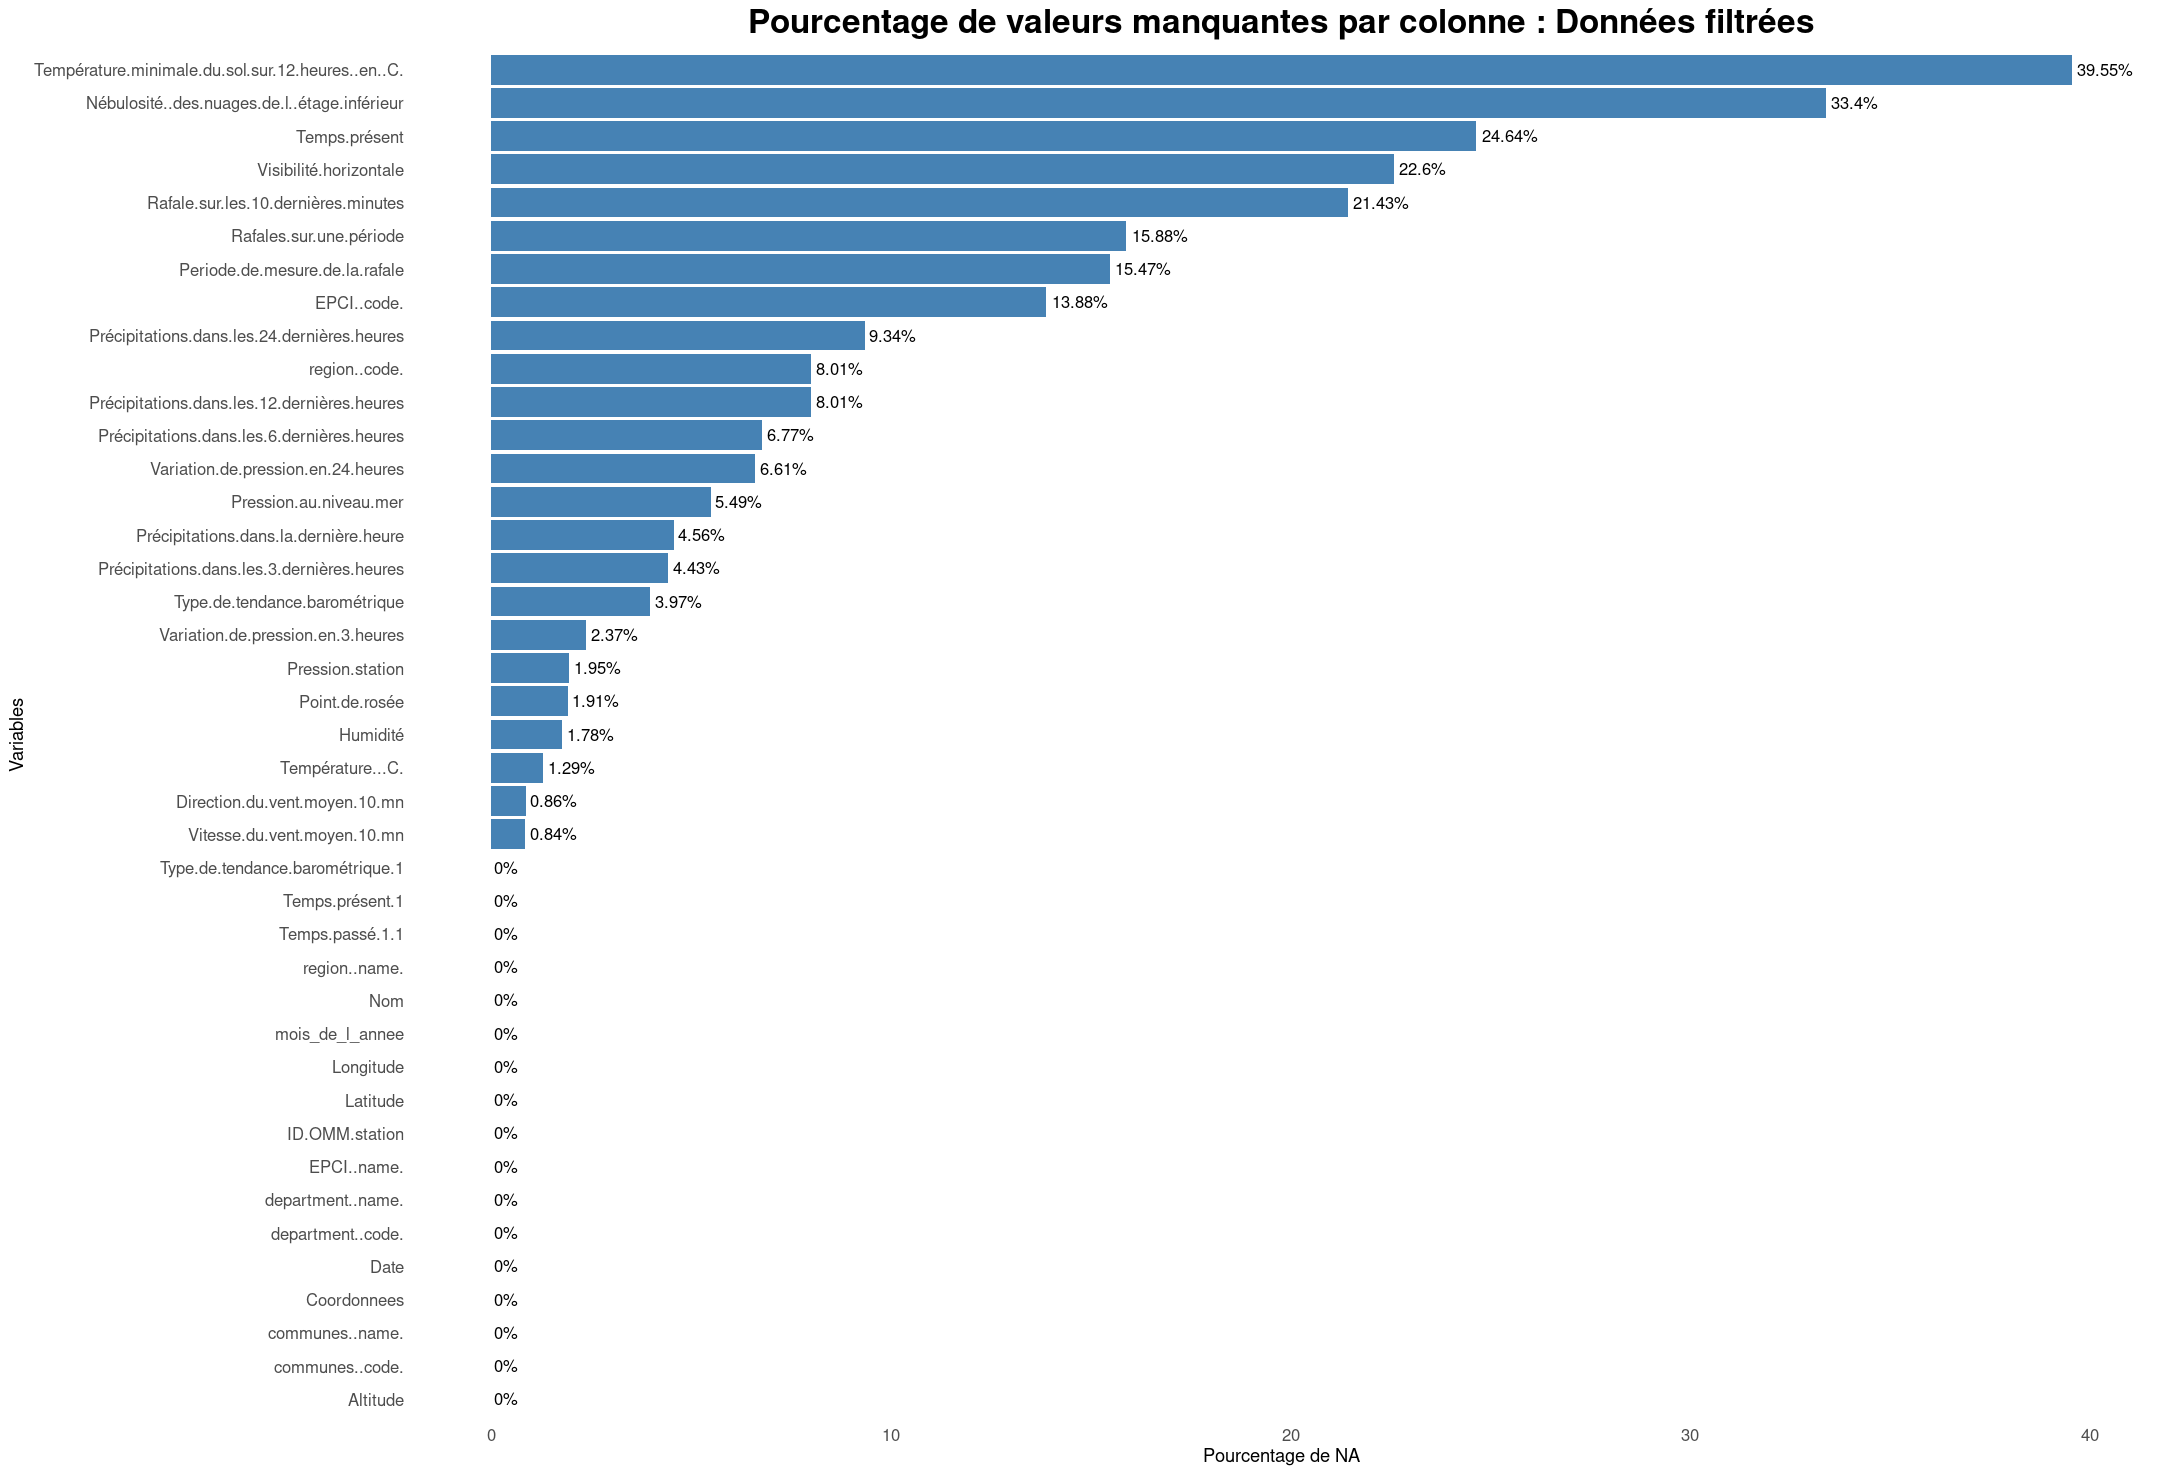

In [11]:
# Taille du graphique
options(repr.plot.width = 18, repr.plot.height = max(6, 0.3 * ncol(data_final)))

# Calcul du pourcentage de NA
na_percent <- sapply(data_final, function(x) mean(is.na(x)) * 100)
na_df <- data.frame(Variable = names(na_percent), NA_Percent = round(na_percent, 2))
na_df <- na_df[order(na_df$NA_Percent, decreasing = TRUE), ]

# Graphique
ggplot(na_df, aes(x = reorder(Variable, NA_Percent), y = NA_Percent)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = paste0(NA_Percent, "%")), hjust = -0.1, size = 3.5) +
  coord_flip() +
  labs(title = "Pourcentage de valeurs manquantes par colonne : Données filtrées",
       x = "Variables",
       y = "Pourcentage de NA") +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

cat("Noms des colonnes :", names(data_final), "\n")

### Analyse des données

#### Statistiques de base des valeurs numériques de data_final

In [12]:
# Sélection des colonnes numériques
numeric_data <- data_final[sapply(data_final, is.numeric)]

# Largeurs fixes
name_width <- 55
value_width <- 15

# En-tête
cat(sprintf("%-*s | %*s | %*s | %*s | %*s\n",
            name_width, "Variable",
            value_width, "Min",
            value_width, "Max",
            value_width, "Mean",
            value_width, "SD"))
cat(strrep("-", name_width + 15 + value_width * 4), "\n")

# Boucle d'affichage
for (colname in names(numeric_data)) {
  col <- numeric_data[[colname]]
  min_val <- round(min(col, na.rm = TRUE), 2)
  max_val <- round(max(col, na.rm = TRUE), 2)
  mean_val <- round(mean(col, na.rm = TRUE), 2)
  sd_val <- round(sd(col, na.rm = TRUE), 2)
  
  cat(sprintf("%-*s | %*.2f | %*.2f | %*.2f | %*.2f\n",
              name_width, colname,
              value_width, min_val,
              value_width, max_val,
              value_width, mean_val,
              value_width, sd_val))
}

Variable                                                |             Min |             Max |            Mean |              SD
---------------------------------------------------------------------------------------------------------------------------------- 


ID.OMM.station                                          |         7005.00 |        89642.00 |        26062.16 |        29911.14
Pression.au.niveau.mer                                  |        93850.00 |       107570.00 |       101576.62 |          913.15
Variation.de.pression.en.3.heures                       |        -2840.00 |         2990.00 |           15.39 |          126.79
Type.de.tendance.barométrique                          |            0.00 |           10.00 |            4.30 |            2.72
Direction.du.vent.moyen.10.mn                           |            0.00 |          360.00 |          175.63 |          104.55
Vitesse.du.vent.moyen.10.mn                             |            0.00 |           47.20 |            4.15 |            3.19
Point.de.rosée                                         |          223.95 |          332.45 |          283.79 |            8.69
Humidité                                               |            1.00 |          100.00 |           75.

#### Visualisation de toutes les colonnes numériques : Scatter plot de la température en fonction des colonnes numériques et Matrice de corrélation

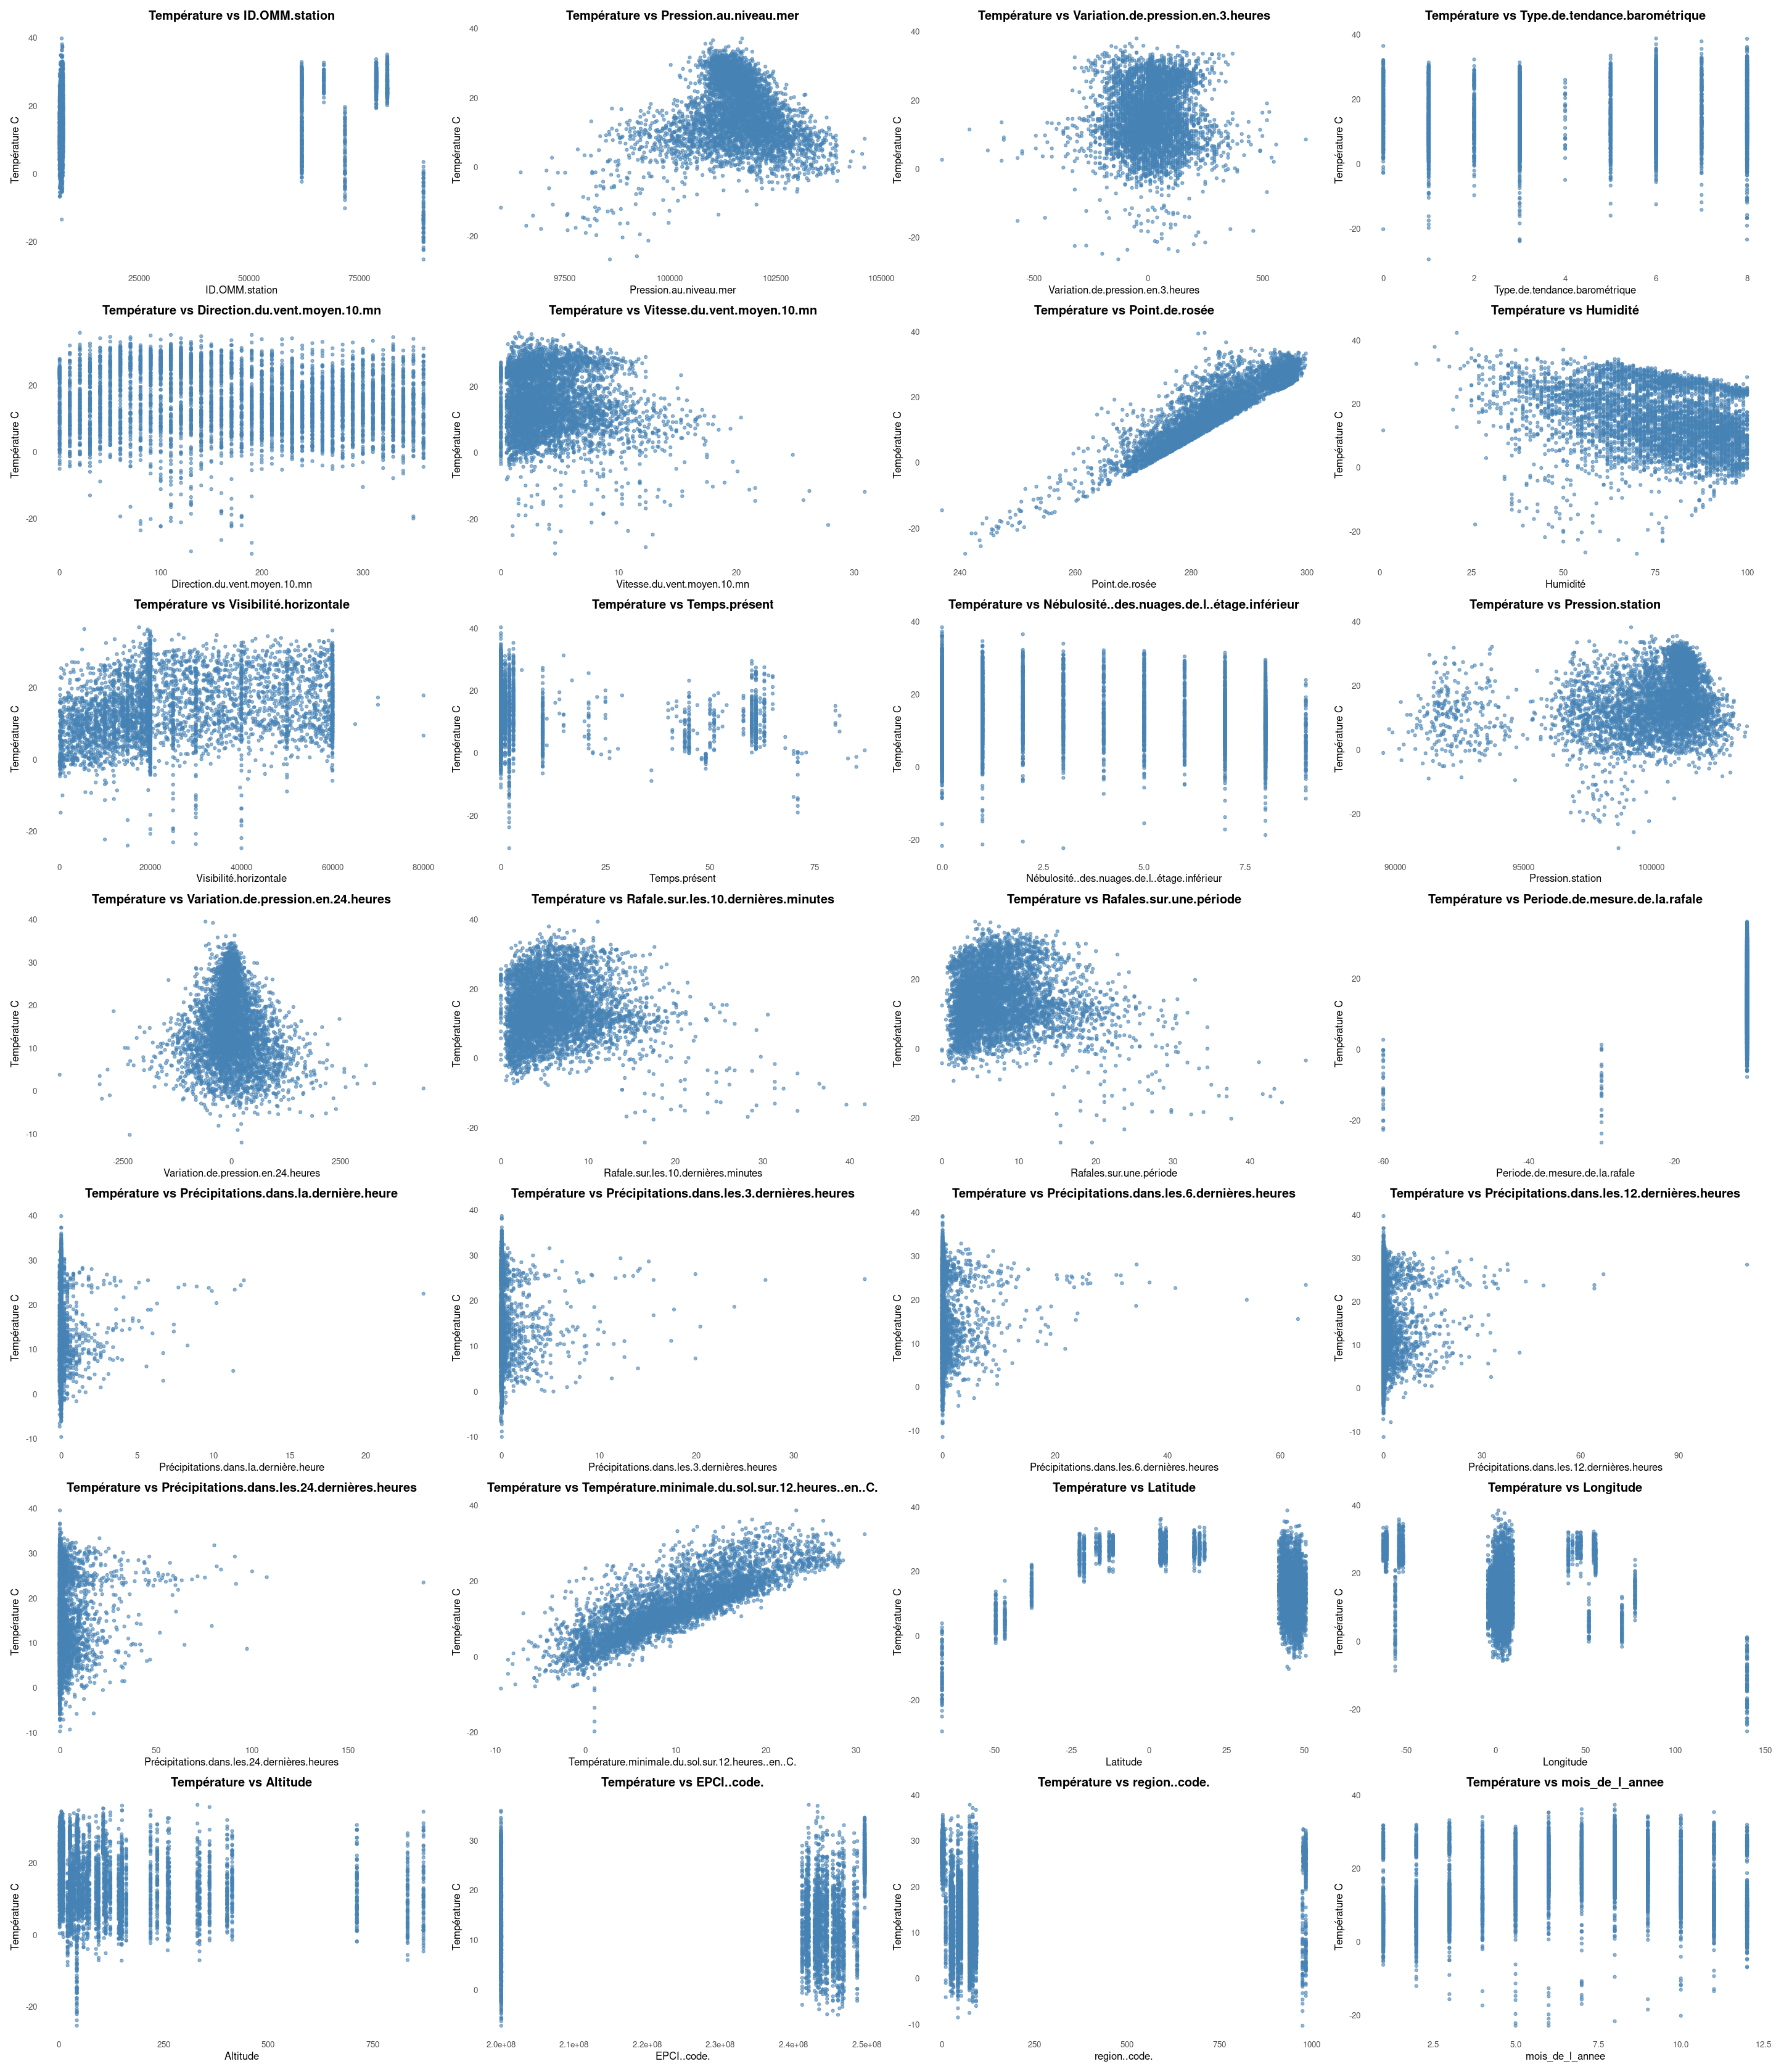

In [13]:
# Paramètres
num_col <- 4 # Nombre de colonnes dans la grille
max_points <- 5000  # Nombre max de points par plot pour éviter la surcharge

# Variable cible
target_var <- "Température...C."

# Sélection des variables numériques (hors cible)
numeric_vars <- names(data_final)[sapply(data_final, is.numeric)]
numeric_vars <- setdiff(numeric_vars, target_var)

# Construire les plots avec sous-échantillonnage en éliminant les NAs
plot_list <- lapply(numeric_vars, function(var) {
  df_clean <- data_final[!is.na(data_final[[var]]) & !is.na(data_final[[target_var]]), ]

  # Sous-échantillonnage
  if (nrow(df_clean) > max_points) {
    df_clean <- df_clean[sample(nrow(df_clean), max_points), ]
  }
  
  ggplot(df_clean, aes(x = .data[[var]], y = .data[[target_var]])) +
    geom_point(color = "steelblue", alpha = 0.6, size = 1.2) +
    labs(title = paste("Température vs", var),
         x = var,
         y = gsub("\\.+", " ", target_var)) +
    theme_minimal(base_size = 10) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
      panel.grid = element_blank()
    )
})

# Ajuster la taille du canevas
options(repr.plot.width = 6 * num_col,
        repr.plot.height = 4 * ceiling(length(plot_list) / num_col))

# Afficher la grille
wrap_plots(plotlist = plot_list, ncol = num_col)

# Réinitialiser la taille du canevas
options(repr.plot.width = 7, repr.plot.height = 5)


Warning message in cor(numeric_data, use = "complete.obs"):
“the standard deviation is zero”


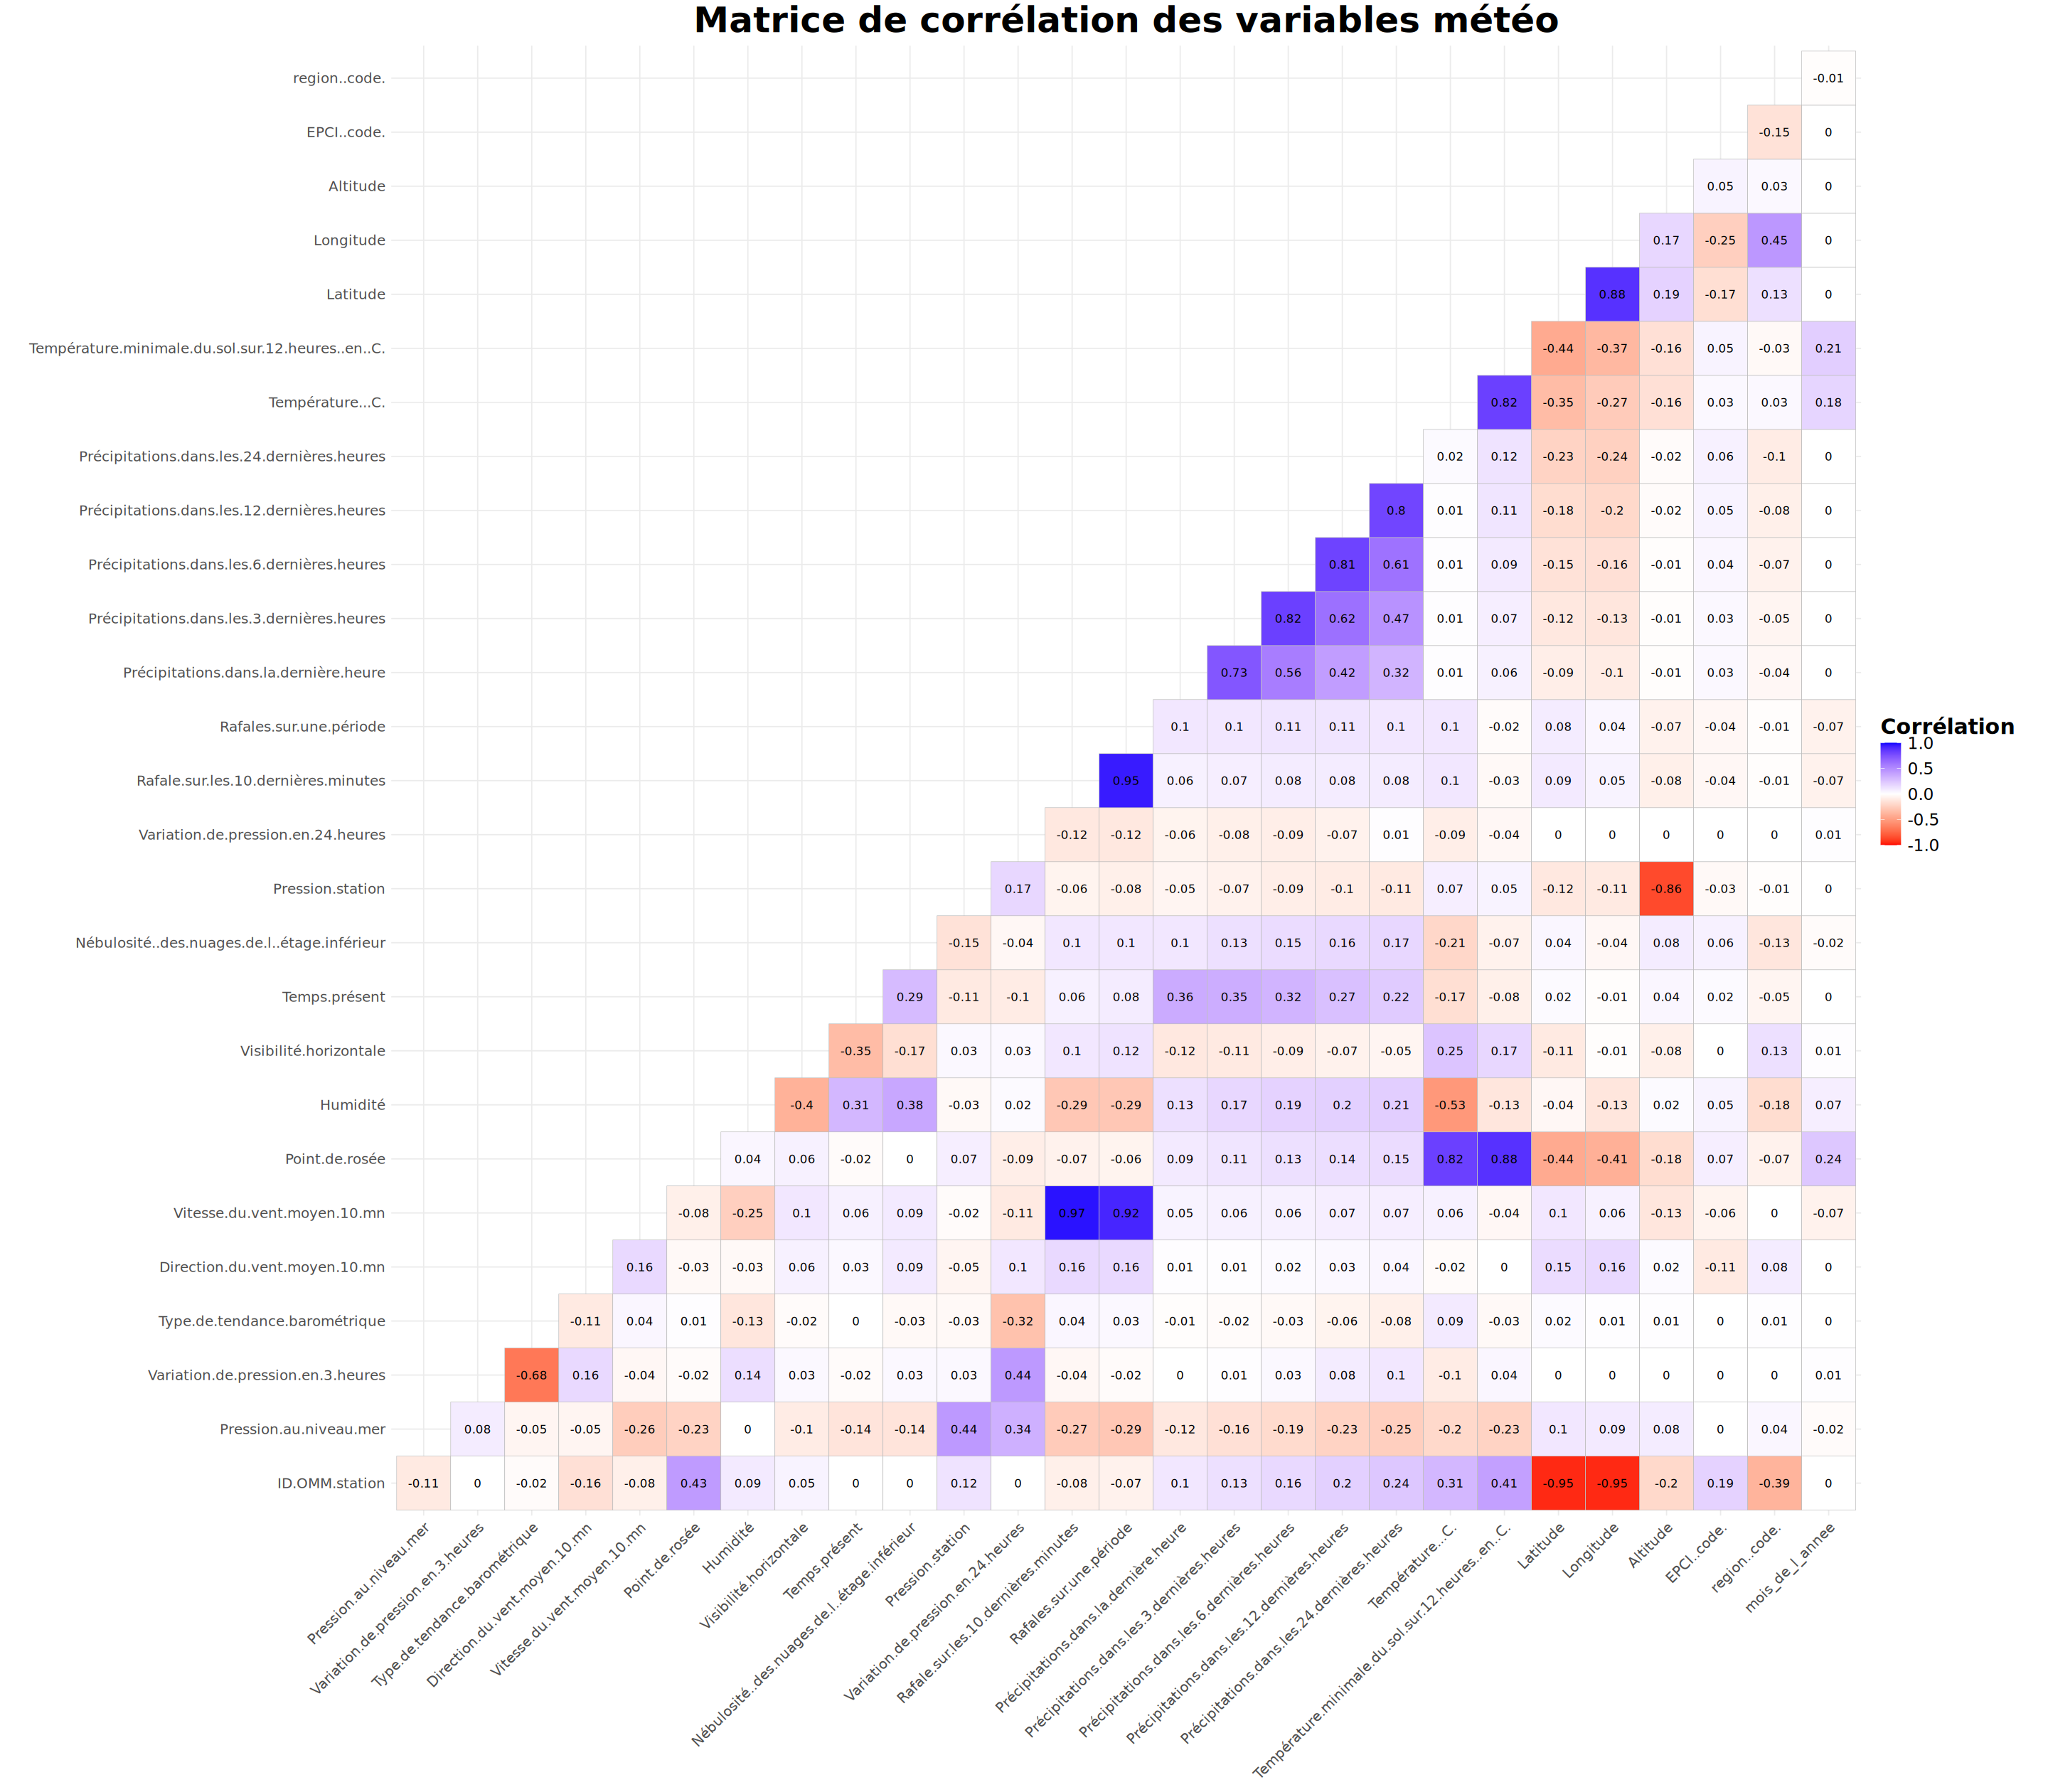

In [ ]:
# Calculer la matrice de corrélation
cor_matrix <- cor(numeric_data, use = "complete.obs")

# Ajuster la taille du canevas
options(repr.plot.width = 6 * num_col,
        repr.plot.height = 3 * ceiling(length(plot_list) / num_col))

# Afficher la heatmap

ggcorrplot(cor_matrix,
           method = "square",          
           type = "lower",
           lab = TRUE,
           lab_size = 3.5,
           legend.title = "Corrélation",
           colors = c("red", "white", "blue"),
           title = "Matrice de corrélation des variables météo",
           ggtheme = theme_minimal() +
                     theme(
                       plot.title = element_text(hjust = 0.5, face = "bold", size = 30),
                       legend.title = element_text(size = 18, face = "bold"),
                       legend.text = element_text(size = 14)
                     )
)

# Réinitialiser la taille du canevas
options(repr.plot.width = 7, repr.plot.height = 5)


### Conclusion de l'analyse exploratoire

Nous avons choisi la température comme variable d’intérêt principal, ce qui nous a permis de recentrer l’analyse sur les colonnes les plus pertinentes du jeu de données. L’exploration statistique, à travers des indicateurs descriptifs, un scatter plot global et une matrice de corrélation, a mis en évidence des relations significatives entre les variables météorologiques. Ces visualisations vont faciliter l’interprétation des tendances et des interactions, ouvrant la voie à nos analyses suivantes.

## Partie 2 : calcul et étude d'estimateur

### Moyenne et intervalle de confiance (IC) à 95%

In [ ]:
temp <- data$Température...C.[!is.na(data$Température...C.)]
n <- length(temp)
moyenne <- mean(temp)
ecart_type <- sd(temp)
erreur_standard <- ecart_type / sqrt(n)
IC_inf <- moyenne - 1.96 * erreur_standard
IC_sup <- moyenne + 1.96 * erreur_standard

cat(sprintf("Moyenne de la température : %.2f °C\n", moyenne))
cat(sprintf("Intervalle de confiance à 95%% : [%.2f ; %.2f] °C\n", IC_inf, IC_sup))


Moyenne de la température : 15.41 °C


Intervalle de confiance à 95% : [15.40 ; 15.42] °C


### Estimation par région

In [ ]:
data_final %>%
  group_by(region..name.) %>%
  summarise(
    moyenne = mean(Température...C., na.rm = TRUE),
    IC_inf = moyenne - 1.96 * sd(Température...C., na.rm = TRUE)/sqrt(n()),
    IC_sup = moyenne + 1.96 * sd(Température...C., na.rm = TRUE)/sqrt(n())
  )

region..name.                               moyenne   IC_inf    IC_sup   
1                                              11.112798 11.037179 11.188417
2  Auvergne-Rhône-Alpes                        12.843774 12.796536 12.891012
3  Bourgogne-Franche-Comté                     12.254824 12.161499 12.348148
4  Bretagne                                    12.772030 12.741977 12.802083
5  Centre-Val de Loire                         12.964214 12.903710 13.024717
6  Corse                                       16.817424 16.761716 16.873132
7  Grand Est                                   11.902154 11.861553 11.942756
8  Guadeloupe                                  26.896396 26.874872 26.917919
9  Guyane                                      26.486657 26.468090 26.505224
10 Hauts-de-France                             11.818923 11.765215 11.872631
11 La Réunion                                  24.596620 24.559104 24.634136
12 Martinique                                  27.321202 27.301837 27.340566
13 Mayotte                                     27.402678 27.367648 27.437708
14 Normandie                                   12.009739 11.975037 12.044440
15 Nouvelle-Aquitaine                          13.700176 13.664023 13.736328
16 Occitanie                                   14.193800 14.160653 14.226947
17 Pays de la Loire                            13.267484 13.191427 13.343541
18 Provence-Alpes-Côte d'Azur                  15.187966 15.142991 15.232941
19 Saint-Barthélemy                            27.681228 27.650097 27.712358
20 Saint-Pierre-et-Miquelon                     6.973322  6.876137  7.070507
21 Terres australes et antarctiques françaises 19.395927 19.313813 19.478041
22 Île-de-France                               12.897563 12.814044 12.981082

### Estimation BootStrap

On va faire une estimation avec la méthode BootStrap pour vérifier que la moyenne et l'écart type qu'on vient de calculer sont bons.

In [ ]:
set.seed(123)  # Pour la reproductibilité
temp_sample <- sample(temp, size = 10000, replace = FALSE)  # Prendre 10 000 observations

# Fonction pour calculer la moyenne
boot_mean <- function(data, indices) {
  return(mean(data[indices]))
}

# Bootstrap (1000 réplicats)
library(boot)
results <- boot(temp_sample, boot_mean, R = 1000)
boot.ci(results, type = "bca")  # Intervalle de confiance


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, type = "bca")

Intervals : 
Level       BCa          
95%   (15.26, 15.64 )  
Calculations and Intervals on Original Scale

La moyenne de température qu'on avait calculé (15.41) se trouve bien dans cet intervalle de confiance, on peut donc dire que notre estimateur est correct.

## Partie 4 : Régression et étude de corrélation

### I. Régression linéaire simple

Au vu des résultats de la partie 1 (meilleur corrélation), on choisit d'effectuer des régressions simples entre la température et :
- Le Point de rosée
- L'humidité
- La température minimale du sol sur les 12 dernières heures

In [14]:
# Régression linéaire de la température en fonction du point de rosée
lm_rosée <- lm(Température...C. ~ Point.de.rosée, data = data_final)
cat("Régression Température ~ Point de rosée :\n")
cat(sprintf("Équation : Température = %.3f + %.3f * Point de rosée\n", coef(lm_rosée)[1], coef(lm_rosée)[2]))

# Régression linéaire de la température en fonction de l humidité
lm_humidite <- lm(Température...C. ~ Humidité, data = data_final)
cat("\nRégression Température ~ Humidité :\n")
cat(sprintf("Équation : Température = %.3f + %.3f * Humidité\n", coef(lm_humidite)[1], coef(lm_humidite)[2]))

# Régression linéaire de la température en fonction de la température minimale du sol sur 12 heures
lm_sol_min <- lm(Température...C. ~ Température.minimale.du.sol.sur.12.heures..en..C., data = data_final)
cat("\nRégression Température ~ Température minimale du sol sur 12h :\n")
cat(sprintf("Équation : Température = %.3f + %.3f * Température minimale du sol sur 12h\n", coef(lm_sol_min)[1], coef(lm_sol_min)[2]))

Régression Température ~ Point de rosée :
Équation : Température = -257.818 + 0.963 * Point de rosée

Régression Température ~ Humidité :
Équation : Température = 27.483 + -0.160 * Humidité

Régression Température ~ Température minimale du sol sur 12h :
Équation : Température = 4.005 + 0.930 * Température minimale du sol sur 12h


In [15]:
#Calcul du R² pour chaque modèle
r2_rosée <- summary(lm_rosée)$r.squared
r2_humidite <- summary(lm_humidite)$r.squared
r2_sol_min <- summary(lm_sol_min)$r.squared
cat(sprintf("\nR² pour Température ~ Point de rosée : %.4f\n", r2_rosée))
cat(sprintf("R² pour Température ~ Humidité : %.4f\n", r2_humidite))
cat(sprintf("R² pour Température ~ Température minimale du sol sur 12h : %.4f\n", r2_sol_min))


R² pour Température ~ Point de rosée : 0.8077
R² pour Température ~ Humidité : 0.0839
R² pour Température ~ Température minimale du sol sur 12h : 0.6723


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32830 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 32830 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 32830 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 32830 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 680383 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 680383 rows containing missing values or values outside the scale range
(`geom_point()`).”


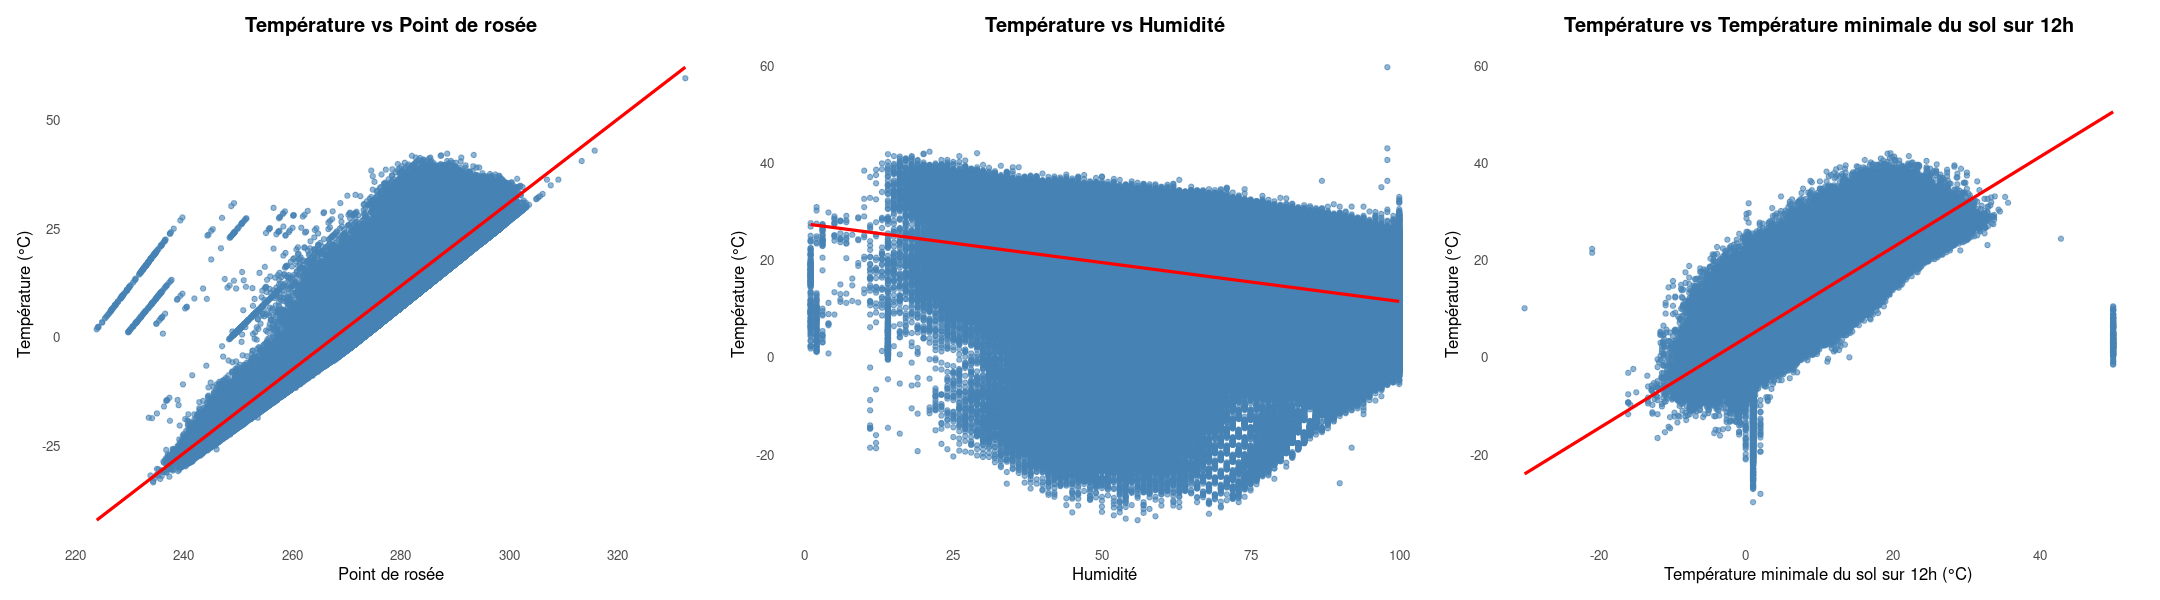

In [ ]:
#Représentation graphique des nuages de points avec les droites de régression
plot1 <- ggplot(data_final, aes(x = Point.de.rosée, y = Température...C.)) +
  geom_point(color = "steelblue", alpha = 0.6, size = 1.2) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Température vs Point de rosée",
       x = "Point de rosée",
       y = "Température (°C)") +
  theme_minimal(base_size = 10) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
    panel.grid = element_blank()
  )

plot2 <- ggplot(data_final, aes(x = Humidité, y = Température...C.)) +
  geom_point(color = "steelblue", alpha = 0.6, size = 1.2) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Température vs Humidité",
       x = "Humidité",
       y = "Température (°C)") +
  theme_minimal(base_size = 10) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
    panel.grid = element_blank()
  )   

plot3 <- ggplot(data_final, aes(x = Température.minimale.du.sol.sur.12.heures..en..C., y = Température...C.)) +
  geom_point(color = "steelblue", alpha = 0.6, size = 1.2) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Température vs Température minimale du sol sur 12h",
       x = "Température minimale du sol sur 12h (°C)",
       y = "Température (°C)") +
  theme_minimal(base_size = 10) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
    panel.grid = element_blank()
  )      
# Afficher les plots côte à côte
options(repr.plot.width = 18, repr.plot.height = 5)
plot1 + plot2 + plot3 + plot_layout(ncol = 3)
# Réinitialiser la taille du canevas
options(repr.plot.width = 7, repr.plot.height = 5)

Conclusions : 
- La régression de la température en fonction de l'humidité est mauvaise (R² < 0.1).
- La régression de la température en fonction de la température minimale du sol sur 12h est meilleure (R² = 0.67) mais peu intéressante physiquement. Il est clair que ces deux variables sont liées mais les variations de la température du sol sont plus faible que celle de l'air.
- Enfin, la régression de la température en fonction du point de rosée est bonne (R² = 0.8) mais pas suffisante pour établir une relation linéaire directe entre ces deux variables. 

Ces trois variables ont une influence sur la température mais n'expliques pas à elles seules la température. On va donc effectuer une régression linéaire multiple.

### II. Régression linéaire multiple

In [17]:
#Régression linéaire multiple de la temmpérature en fonction du point de rosée et de l'humidité
lm_multiple <- lm(Température...C. ~ Point.de.rosée + Humidité, data = data_final)
cat("Régression Température ~ Point de rosée + Humidité :\n")
cat(sprintf("Équation : Température = %.3f + %.3f * Point de rosée\n + %.3f * Humidité", coef(lm_multiple)[1], coef(lm_multiple)[2], coef(lm_multiple)[3]))

Régression Température ~ Point de rosée + Humidité :
Équation : Température = -259.207 + 1.031 * Point de rosée
 + -0.238 * Humidité

In [18]:
#Calcul du R² pour le modèle multiple
r2_multiple <- summary(lm_multiple)$r.squared
cat(sprintf("\nR² pour Température ~ Point de rosée + Humidité : %.4f\n", r2_multiple))


R² pour Température ~ Point de rosée + Humidité : 0.9902


Conclusion : La régression linéaire multiple donne de bien meilleur résultats (R² = 0.99). L'équation : -259.207 +1.031 * Point de rosée -0.238 * Humidité
semble être un bon modèle de la température. 

### III. Etude de corrélation

Déjà fait en partie 1 avec la matrice de corrélation sous forme de heat map.

On retrouve le fait que la température est fortement corrélée avec le point de rosée et la température minimal du sol (0.82), et également dans une moindre mesure avec l'humidité (-0.53). 

## Partie 6 : Une méthode de clustering

L’objectif est de regrouper les stations météorologiques en fonction de leurs caractéristiques observées afin de mettre en évidence des profils climatiques similaires.
La question centrale est : Quelles variables (ou combinaisons de variables) structurent les regroupements entre stations ?

On commence par sélectionner quelques variables météorologiques jugées pertinentes (comme la température, l’humidité ou la pression) afin de résumer le profil de chaque station. On calcule ensuite des valeurs moyennes pour chaque station afin de rendre les données comparables entre elles. Enfin, on nettoie les éventuelles valeurs manquantes pour obtenir un tableau clair et complet, qui servira de base au regroupement des stations.

In [ ]:
library(dplyr)

vars_clustering <- c("Température...C.",
                     "Température.minimale.du.sol.sur.12.heures..en..C.",
                     "Humidité",
                     "Point.de.rosée",
                     "Pression.station")

data_cluster <- data_final %>%
  group_by(ID.OMM.station) %>%
  summarise(across(all_of(vars_clustering), \(x) mean(x, na.rm = TRUE))) %>%
  ungroup() %>%
  as.data.frame()

row.names(data_cluster) <- data_cluster$ID.OMM.station
data_cluster <- data_cluster[,-1]

data_cluster <- data_cluster %>%
  mutate(across(where(is.numeric), 
                ~ ifelse(is.na(.) | is.nan(.) | is.infinite(.), mean(., na.rm = TRUE), .)))

data_cluster



Température...C. Température.minimale.du.sol.sur.12.heures..en..C.
7005  11.649503         8.679325                                        
7015  11.987338         8.357650                                        
7020  12.776474        10.215723                                        
7027  11.912485         9.336434                                        
7037  11.492857         9.498345                                        
7072  11.686203         7.779000                                        
7110  12.093257         8.526150                                        
7117  12.605806        10.215723                                        
7130  12.696035         9.319161                                        
7139  11.882771        10.930911                                        
7149  12.897563         6.676471                                        
7168  12.227210         8.082292                                        
7181  11.442768         6.506016                                        
7190  12.260956         7.973149                                        
7207  13.708418        10.215723                                        
7222  13.267484         9.164761                                        
7240  12.997419        10.093167                                        
7255  12.931102         9.209619                                        
7280  12.254824         9.720620                                        
7299  11.893072         9.018658                                        
7314  14.265560        10.215723                                        
7335  13.018478         9.803545                                        
7434  12.442323         9.705347                                        
7460  12.979888         8.515882                                        
7471   9.839935         5.662296                                        
7481  13.646601         7.571429                                        
7510  14.636852         9.667944                                        
7535  13.497936        10.757047                                        
7558  11.784057         7.835141                                        
7577  14.869047        11.192605                                        
⋮     ⋮                ⋮                                                
7621   13.296821       10.2481284                                       
7627   13.001483        9.8927172                                       
7630   14.909721       10.9462706                                       
7643   16.099823       11.6617442                                       
7650   16.541643       11.3476429                                       
7661   16.327673       10.2157231                                       
7690   17.048284       13.7119631                                       
7747   16.810330       12.2816546                                       
7761   16.724580       12.1371826                                       
7790   16.910827       13.0809446                                       
61968  27.064415       10.2157231                                       
61970  28.246005       10.2157231                                       
61972  25.514831       10.2157231                                       
61976  26.848685       10.2157231                                       
61980  24.596620       19.0708661                                       
61996  14.468868       11.4485219                                       
61997   5.615424        3.2085048                                       
61998   5.343497        4.6376898                                       
67005  27.402678       22.7454545                                       
71805   6.563439        6.2756088                                       
78890  27.549898       10.2157231                                       
78894  27.654004       10.2157231                                       
78897  26.428582       23.9289933                               

Ensuite, on met toutes les variables sur la même échelle pour éviter que l’une d’elles domine les autres. On calcule les distances entre stations et on applique un clustering hiérarchique (méthode de Ward) pour regrouper les stations les plus proches. Le dendrogramme obtenu permet de visualiser la hiérarchie des regroupements, et on choisit un nombre de groupes (ici 4) en traçant des séparations dans l’arbre.

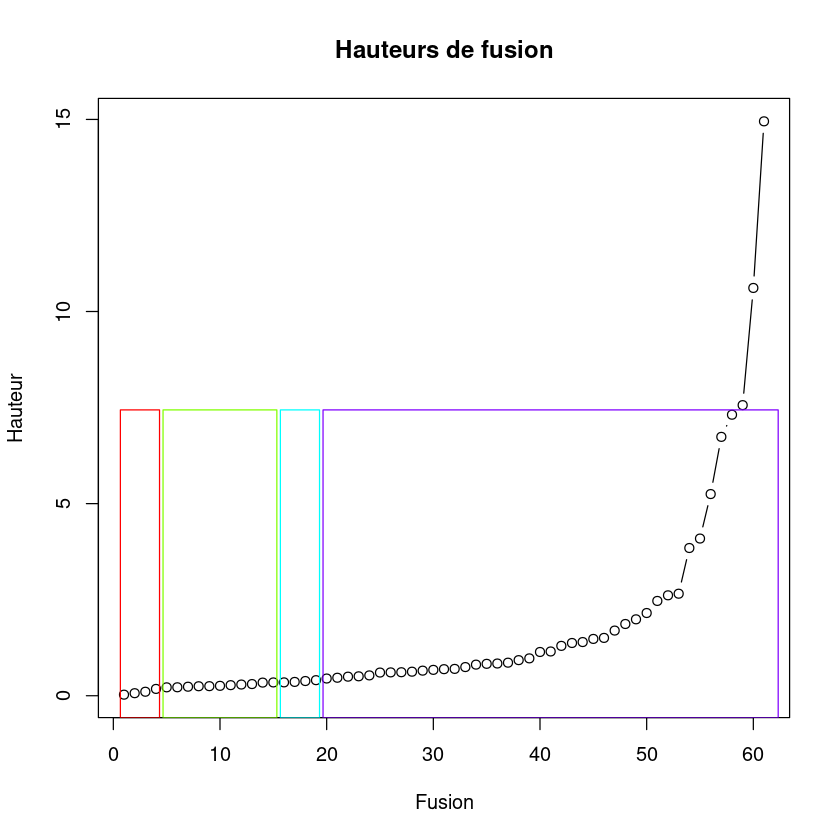

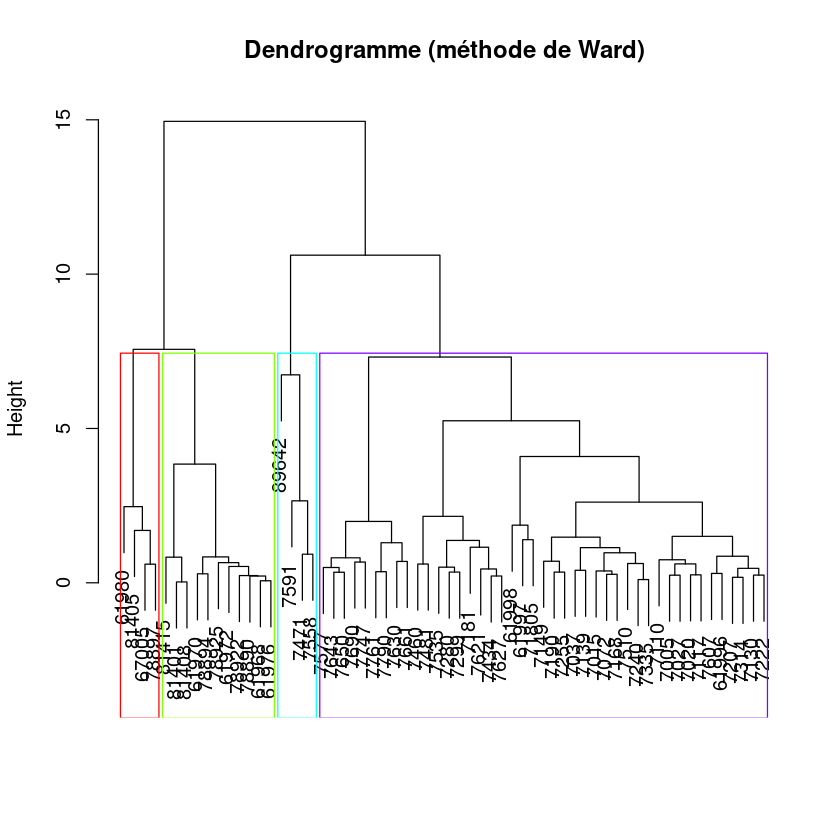

In [ ]:
par(bg="white")
data_scaled <- scale(data_cluster)
dist_mat <- dist(data_scaled)
cah <- hclust(dist_mat, method = "ward.D2")

plot(cah$height, type="b", main="Hauteurs de fusion", ylab="Hauteur", xlab="Fusion")
k <- 4
gr <- cutree(cah, k)
rect.hclust(cah, k=k, border=rainbow(k))

plot(cah,, main="Dendrogramme (méthode de Ward)", xlab="", sub="")
rect.hclust(cah, k = k, border =rainbow(k))

On calcule le profil moyen de chaque groupe de stations, ce qu’on appelle le barycentre d’un cluster. Cela permet de résumer chaque regroupement par ses caractéristiques météorologiques typiques et de comparer facilement les profils moyens des différents clusters.

In [ ]:
# calcul des barycentres : aggregate -> data.frame -> matrice (sans la colonne groupe)
centres_df <- aggregate(data_cluster, by = list(cluster = gr), FUN = mean)
# centres_df a une colonne 'cluster' puis 5 colonnes de moyennes
centres_mat <- as.matrix(centres_df[ , -1, drop = FALSE])  # matrice nrow = k, ncol = 5

On utilise les profils moyens des clusters calculés précédemment pour lancer un K-means stable, qui attribue chaque station à un groupe de façon définitive. Cela permet de confirmer et de stabiliser le regroupement des stations autour de profils représentatifs.

In [ ]:
km <- kmeans(data_cluster, centers = centres_mat)
cat("Groupes des individus pour le K-means stable :\n")
print(km$cluster)

Groupes des individus pour le K-means stable :


 7005  7015  7020  7027  7037  7072  7110  7117  7130  7139  7149  7168  7181 
    3     3     3     3     3     3     3     3     3     3     3     3     1 
 7190  7207  7222  7240  7255  7280  7299  7314  7335  7434  7460  7471  7481 
    3     3     3     3     3     1     1     3     3     1     1     2     1 
 7510  7535  7558  7577  7591  7607  7621  7627  7630  7643  7650  7661  7690 
    3     1     2     3     2     3     1     1     3     3     3     3     3 
 7747  7761  7790 61968 61970 61972 61976 61980 61996 61997 61998 67005 71805 
    3     3     3     3     3     3     3     3     3     1     3     3     3 
78890 78894 78897 78922 78925 81401 81405 81408 81415 89642 
    3     3     3     3     3     3     3     3     3     1 


On compare les résultats du clustering hiérarchique et du K-means en construisant une table de contingence. Cela permet de voir dans quelle mesure les deux méthodes assignent les mêmes stations aux mêmes groupes et d’évaluer la cohérence des clusters.

In [ ]:
tab <- table(CAH = gr, KMEANS = km$cluster)
print("Table de contingence CAH vs KMeans :")
print(tab)

[1] "Table de contingence CAH vs KMeans :"
   KMEANS
CAH  1  2  3
  1 10  0 33
  2  1  3  0
  3  0  0 11
  4  0  0  4


Les clusters principaux montrent une bonne correspondance entre CAH et K-means, notamment pour le cluster 3 qui est parfaitement stable. En revanche, certains groupes comme le cluster 1 présentent des différences, certaines stations étant réparties entre plusieurs clusters selon la méthode, ce qui reflète une certaine variabilité dans les profils.

On réalise une analyse en composantes principales (ACP) pour réduire les variables météo à deux dimensions principales, ce qui permet de visualiser les différences entre stations. Chaque station est ensuite affichée sur le graphique, colorée selon son groupe issu du clustering hiérarchique. Cela permet de voir si les clusters sont bien séparés dans l’espace des profils thermiques.

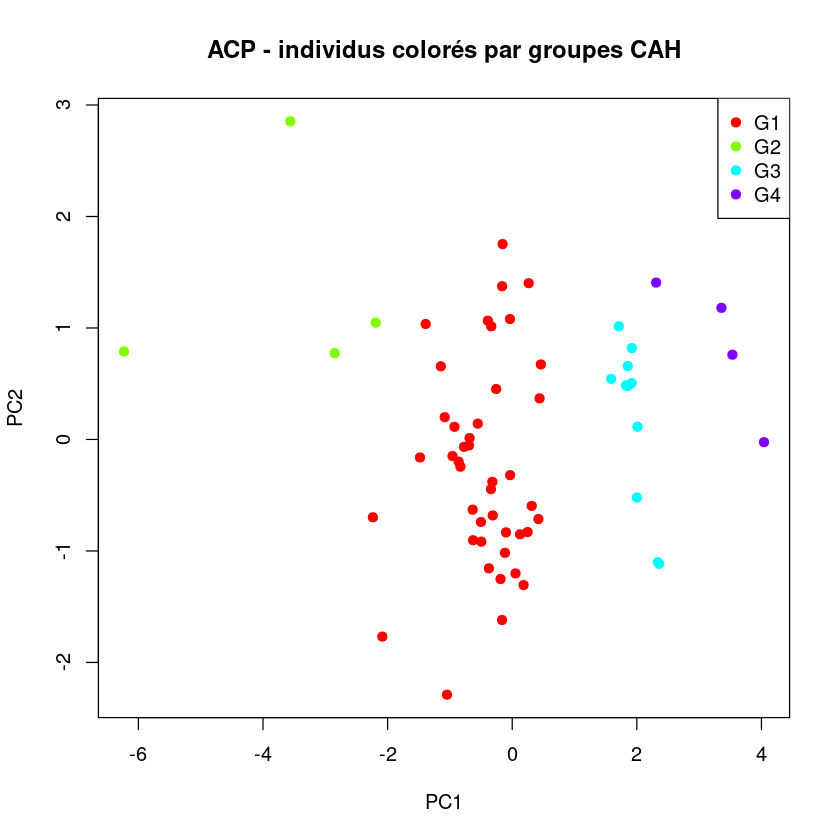

In [ ]:
par(bg="white")
acp <- prcomp(data_cluster, scale.=TRUE)

coords <- acp$x[,1:2]

# Tracé ACP avec couleurs par groupe
cols <- rainbow(k)
plot(coords, col=cols[gr], pch=19,
     xlab="PC1", ylab="PC2",
     main="ACP - individus colorés par groupes CAH")
legend("topright", legend=paste0("G", 1:k), col=cols, pch=19)

On compare la répartition de la température entre les différents groupes de stations. Le boxplot montre la variation et la médiane de la température dans chaque cluster, ce qui permet de visualiser les différences de profils thermiques entre les groupes.

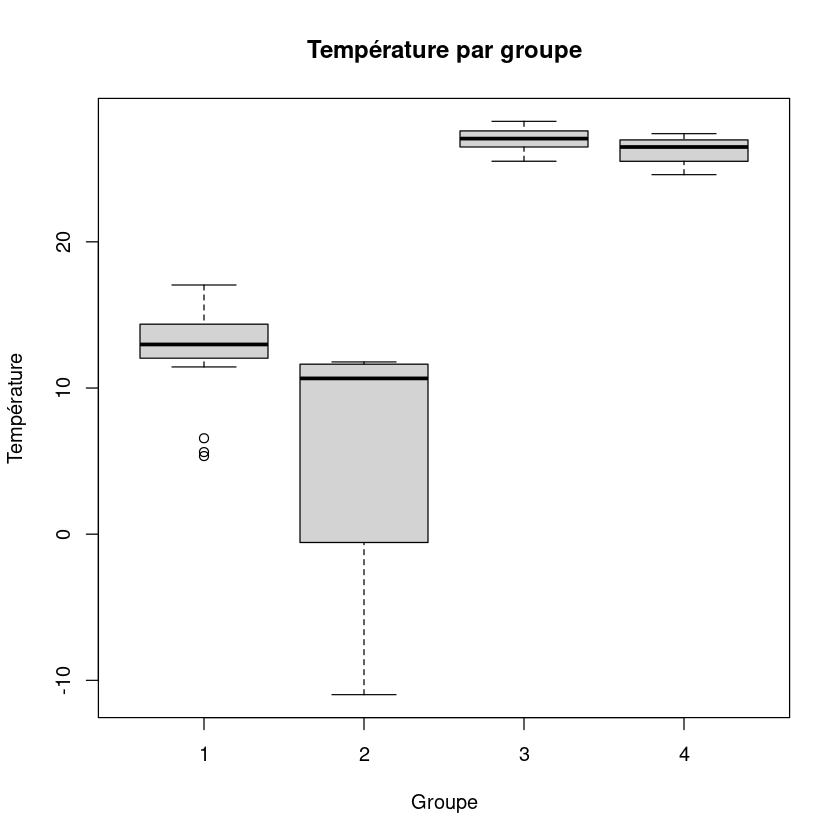

In [ ]:
par(bg="white")
boxplot(data_cluster$Température...C. ~ gr, main="Température par groupe", xlab="Groupe", ylab="Température")